#### Obravnava problema nihanja s 2 PS ($x_1(t)$ in $x_2(t)$) ob vzbujanju $y(t)$ in uporabo konvolucijskega integrala

In [1]:
#import numpy and matplotlib
import numpy as np;
import matplotlib.pyplot as plt;
#use plot style seaborn
plt.style.use('seaborn');
colors = np.array(['#390099', '#9e0059', '#ff0054', '#ff5400', '#ffbd00', '#80ff72', '#00d084', '#00a3af']);


C:\Users\marko\AppData\Local\Temp\ipykernel_14788\2329666743.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn');


##### Neodvisna spremenljivka $t$ in podatki - lastnosti sistema

In [2]:
t = np.linspace(0, 40, 4001)
g = 9.81
m1 = 30;
d1 = 0;
k1 = 1000;
m2 = 40;
d2 = 0;
k2 = 500;

#create matrices M and K of zeroes and add values
M = np.zeros((2,2))
K = np.zeros((2,2))
M[0,0] = m1
M[1,1] = m2
K[0,0] = k1
K[0,1] = -k1
K[1,0] = -k1
K[1,1] = k1+k2

# M = np.array([[m1, 0], [0, m2]])
# K = np.array([[k1+k2, -k2], [-k2, k2]])

d_krit1 = np.sqrt(k1/m1)
delta1 = d1/d_krit1
d_krit2 = np.sqrt(k2/m2)
delta2 = d2/d_krit2


#print d, d_krit, delta
print(f'delta1 \t\t = {delta1:.3f}')
print(f'd_krit1 \t = {d_krit1:.3f}')
print(f'd1 \t\t = {d1:.3f}')

print(f'delta2 \t\t = {delta2:.3f}')
print(f'd_krit2 \t = {d_krit2:.3f}')
print(f'd2 \t\t = {d2:.3f}')

delta1 		 = 0.000
d_krit1 	 = 5.774
d1 		 = 0.000
delta2 		 = 0.000
d_krit2 	 = 3.536
d2 		 = 0.000


#### Izračun $\omega_0$ in $\omega_{0d}$

In [3]:
omega01 = np.sqrt(k1/m1)
omega0D1 = omega01 * np.sqrt(1 - delta1**2)
omega02 = np.sqrt(k2/m2)
omega0D2 = omega02 * np.sqrt(1 - delta2**2)

print(f'omega01 \t = {omega01:.3f} rad/s')
print(f'omega0D1 \t = {omega0D1:.3f} rad/s')
print(f'omega02 \t = {omega02:.3f} rad/s')
print(f'omega0D2 \t = {omega0D2:.3f} rad/s')

omega01 	 = 5.774 rad/s
omega0D1 	 = 5.774 rad/s
omega02 	 = 3.536 rad/s
omega0D2 	 = 3.536 rad/s


In [4]:
A = np.linalg.inv(M) @ K


#eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)
print("eigenvalues")
print(eigenvalues)
print(" ")
print("eigenvectors")
print(eigenvectors)
print(" ")
eigenvectors = eigenvectors / eigenvectors[0,:]
print(f'normalized eigenvectors: \n {eigenvectors}')
print(" ")
print("A")
print(A)

eigenvalues
[ 6.47407502 64.35925831]
 
eigenvectors
[[-0.77866938  0.73198769]
 [-0.62743446 -0.68131786]]
 
normalized eigenvectors: 
 [[ 1.          1.        ]
 [ 0.80577775 -0.93077775]]
 
A
[[ 33.33333333 -33.33333333]
 [-25.          37.5       ]]


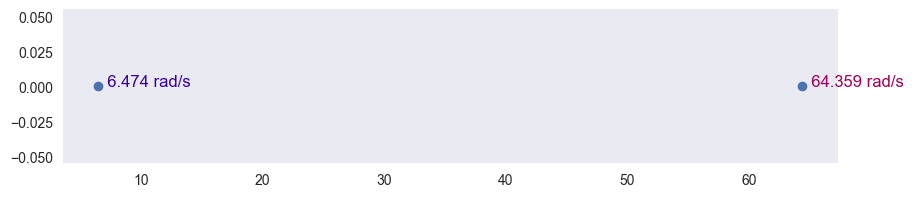

omega1 	 = 64.359 rad/s
omega2 	 = 6.474 rad/s


In [5]:
plt.figure(figsize=(10,2))
plt.grid()
plt.plot(eigenvalues.real, eigenvalues.imag, 'o')
#shoe values as flaot with 2 decimal places
for i in range(len(eigenvalues)):
    plt.text(eigenvalues[i].real, eigenvalues[i].imag, f'  {eigenvalues[i]:.3f} rad/s ', fontsize=12, color=colors[i])
#plt.axhline(0, color='k', lw=1, alpha=0.2)
plt.show()

#define omega 1, 2 and 3 as eigenvalues [-1, -2, -3]
omega1 = eigenvalues[-1]
omega2 = eigenvalues[-2]

#print omega 1, 2
print(f'omega1 \t = {omega1:.3f} rad/s')
print(f'omega2 \t = {omega2:.3f} rad/s')

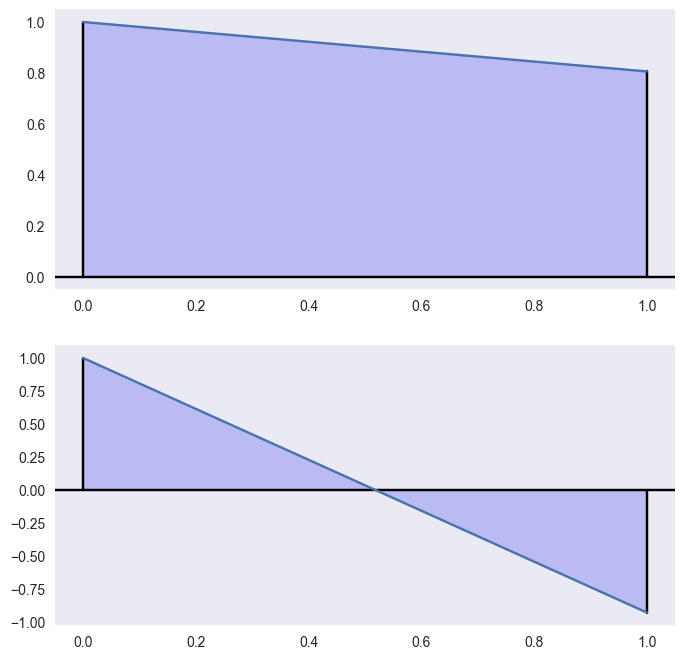

In [6]:
plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.fill_between(np.arange(0,2), eigenvectors[:,0], color='blue', alpha=0.2)
plt.plot([0,0], [0, eigenvectors[0,0]], 'black')
plt.plot([1,1], [0, eigenvectors[1,0]], 'black')
plt.axhline(0, color='black')
plt.axhline(y=0, color='k', lw=0.2)
plt.grid()
plt.plot(eigenvectors[:,0])

plt.subplot(2,1,2)
plt.fill_between(np.arange(0,2), eigenvectors[:,1], color='blue', alpha=0.2)
plt.plot([0,0], [0, eigenvectors[0,1]], 'black')
plt.plot([1,1], [0, eigenvectors[1,1]], 'black')
# plt.ylim(0.95, 1.1)
plt.axhline(y=0, color='k')
plt.grid()
plt.plot(eigenvectors[:,1])



In [7]:
#calculate modal mass as eigenvector transpose * M * eigenvector
modal_mass1 = eigenvectors[:,0].T @ M @ eigenvectors[:,0]
modal_mass2 = eigenvectors[:,1].T @ M @ eigenvectors[:,1]

#calculate modal stiffnes as eigenvector transpose * K * eigenvector
modal_stiffness1 = eigenvectors[:,0].T @ K @ eigenvectors[:,0]
modal_stiffness2 = eigenvectors[:,1].T @ K @ eigenvectors[:,1]



print(f'M1  = {modal_mass1:.3f}')
print(f'M2  = {modal_mass2:.3f}')
print(" ")
print(f'K1  = {modal_stiffness1:.3f}')
print(f'K2  = {modal_stiffness2:.3f}')

M1  = 55.971
M2  = 64.654
 
K1  = 362.361
K2  = 4161.076


In [8]:
#create modal mass matrix and modal stiffness matrix
#define modal matrix
modal_mass_matrix = np.zeros((2,2))
#add values to modal matrix
for i in range(2):
    modal_mass_matrix[i,i] = eigenvectors[:,i].T @ M @ eigenvectors[:,i]
print(modal_mass_matrix)

[[55.97111125  0.        ]
 [ 0.         64.65388875]]


In [9]:
#define matrix o modal stiffness
modal_stiffness_matrix = np.zeros((2,2))
#add values to modal stiffness matrix
for i in range(2):
    modal_stiffness_matrix[i,i] = eigenvectors[:,i].T @ K @ eigenvectors[:,i]
print(modal_stiffness_matrix)

[[ 362.36117332    0.        ]
 [   0.         4161.07632668]]


Omega pride narobe?

In [10]:
#calculate omega 1 from modal mass and modal stiffness
omega2 = np.sqrt(modal_stiffness_matrix[-2,-2]/modal_mass_matrix[-2,-2])
#calculate omega 1 in radians per second
print(f'modal stiffness 2 = {modal_stiffness_matrix[-2,-2]:.3f}')
print(f'modal mass 2 = {modal_mass_matrix[-2,-2]:.2f}')
omega2 = omega2**2
print(f'omega1 = {omega2:.2f} rad/s')

modal stiffness 2 = 362.361
modal mass 2 = 55.97
omega1 = 6.47 rad/s


In [11]:
print("Eigenvectors:")
print(f'{eigenvectors[0, -1]:.3f}')
print(f'{eigenvectors[1, -1]:.3f}')
print("  ")
print(f'{eigenvectors[0, -2]:.3f}')
print(f'{eigenvectors[1, -2]:.3f}')

Eigenvectors:
1.000
-0.931
  
1.000
0.806


In [20]:
#define vectors C and phi
C = np.zeros((2))
phi = np.zeros((2))

C1 = -0.2;
C2 = 1;

C[0] = C1;
C[1] = C2;

phi1 = 100 * np.pi/180;
phi2 = 0 * np.pi/180;

phi[0] = phi1;
phi[1] = phi2;
t = np.linspace(0, 20, 200000)

In [21]:
x_1 = eigenvectors[0,-1] * C1 * np.cos(omega1 * t - phi1) + eigenvectors[0,-2] * C2 * np.cos(omega2 * t - phi2)
x_2 = eigenvectors[1, -1] * C1 * np.sin(omega1 * t - phi1) + eigenvectors[1, -2] * C2 * np.sin(omega2 * t - phi2)

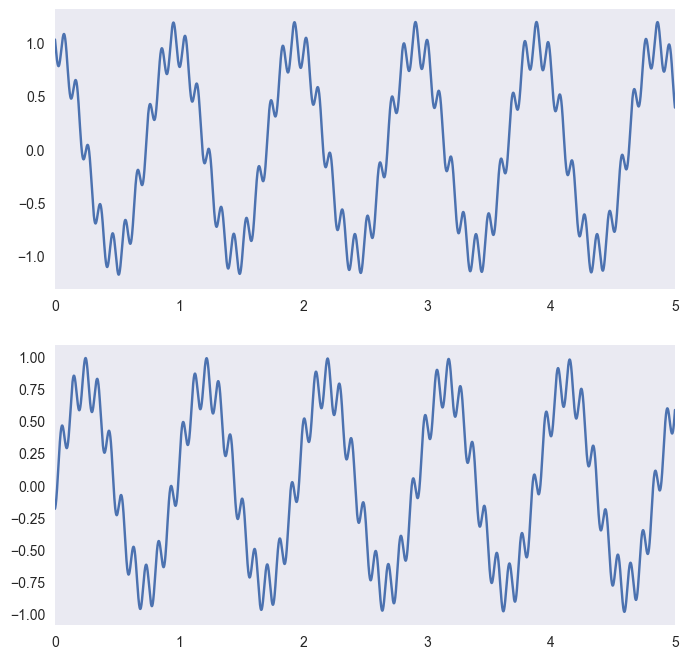

In [22]:
#plot x_1, x_2 and x_3 verticaly on three plots
plt.figure(figsize=(8,8))
#range axis 
plt.subplot(2,1,1)
plt.xlim(0, 5)
plt.plot(t, x_1)
plt.grid()
plt.subplot(2,1,2)
plt.xlim(0, 5)
plt.plot(t, x_2)
plt.grid()

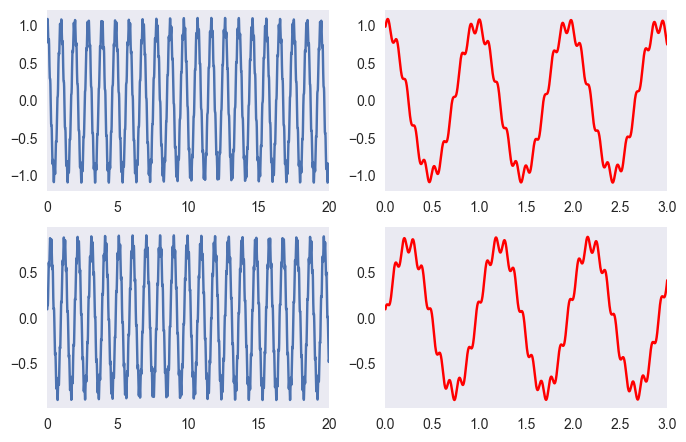

In [19]:
plt.figure(figsize=(8,8))
#range axis
plt.subplot(3,2,1)
plt.xlim(0, 20)
plt.plot(t, x_1)
plt.grid()
plt.subplot(3,2,2)
plt.xlim(0, 3)
plt.plot(t, x_1, color='red')
plt.grid()  
plt.subplot(3,2,3)
plt.xlim(0, 20)
plt.plot(t, x_2)
plt.grid()
plt.subplot(3,2,4)
plt.xlim(0, 3)
plt.plot(t, x_2, color='red')
plt.grid()


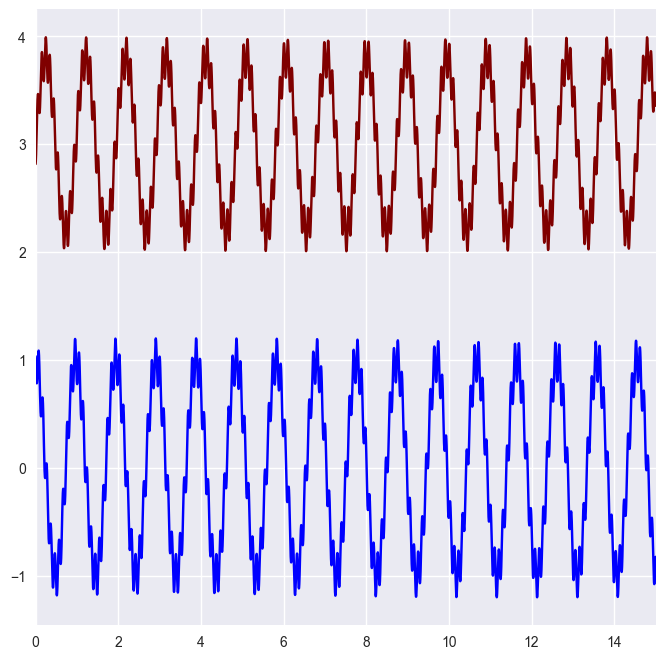

In [25]:
#plot x_1, x_2 ond the same plot but with different colors
plt.figure(figsize=(8,8))
plt.xlim(0, 15)
plt.plot(t, x_1, color='blue')
plt.plot(t, x_2 + 3, color='maroon')
